This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fconference-ia/HEAD?filepath=notebooks%2F5_support_vector_machine/)

# Importance of scaling: linear and kernel SVMs
Experiment the importance of scaling on a toy example for both linear and non-linear SVMs


In [1]:
# Import modules
%matplotlib inline
import matplotlib
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Generate (unscaled) data
The first variable is the informative one, but is three magnitude orders smaller than the second

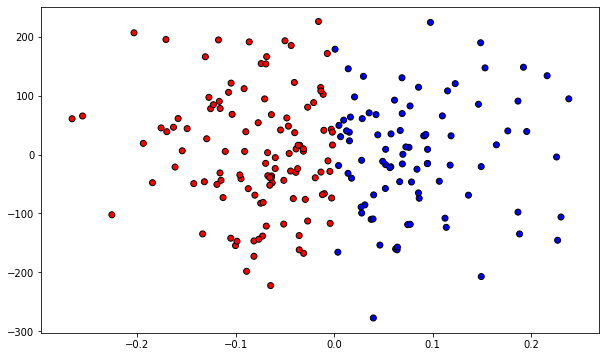

In [2]:
sp.random.seed(0)
X = sp.random.randn(200,2)
X[:,0] *= 0.1
X[:,1] *= 100

# Create a vertical class boundary: depends on the first variable X[:,0]  only
y = np.ones((200,))
y[X[:,0]<0]=0

# Plot the dataset

from matplotlib.colors import ListedColormap

plt.figure(figsize=(10,6))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright,
    edgecolors='k')
plt.show()

Here the second variable (ordinate) is **three magnitude orders larger** than the first one (abcissa)
 
We train now a SVM classifier on these unscaled data

In [3]:
# Performance of SVM  (rbf kernel) classifier

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0, stratify=y)
model = SVC(kernel='rbf',gamma='auto')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Classification accuracy before scaling: {}".format(accuracy_score(y_test,y_pred)))

Classification accuracy before scaling: 0.5625


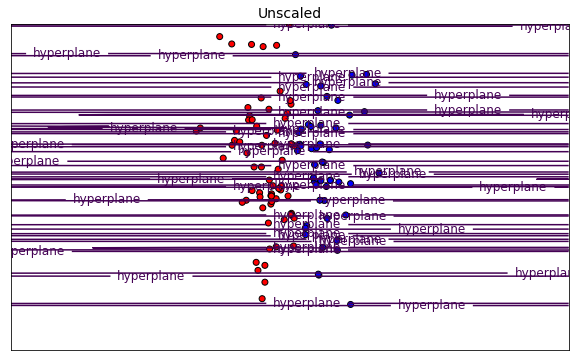

In [4]:
# display decision boundary

from matplotlib.colors import ListedColormap

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/1000),
                     np.arange(y_min, y_max,(y_max-y_min)/1000 ))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points
fig, ax= plt.subplots(figsize=(10,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
    edgecolors='k')
plt.title('Unscaled', fontsize=14)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

Z = model.decision_function(sp.c_[xx.ravel(), yy.ravel()])
cs = ax.contour(xx, yy, Z.reshape(xx.shape), [0]) 
cs.levels = ['hyperplane']
ax.clabel(cs, cs.levels, inline=True, fontsize=12)
plt.show()

#### Exercice:
- Is this SVM classifier really useful (compare with the trivial uniform classifier)? 
- How can we interpret the shape of the decision boundary ?


## Scale data

### Minmax scaling

In [5]:
 # Scale data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_s= sc.fit_transform(X_train) # Scale data between 0 and 1
X_test_s= sc.transform(X_test) # Scale data between 0 and 1

In [6]:
# We train now a SVM classifier on these SCALED data

model = SVC(kernel='rbf',gamma='auto')
model.fit(X_train_s,y_train)
y_pred = model.predict(X_test_s)
print("Classification accuracy after scaling: {}".format(accuracy_score(y_test,y_pred)))

Classification accuracy after scaling: 0.9625


### Standardization scaling

In [7]:
# Standardize the data (centered with unit variance)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s= sc.fit_transform(X_train)
X_test_s= sc.transform(X_test)

model = SVC(kernel='rbf',gamma='auto')
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)
print("Classification accuracy after standardization: {}".format(accuracy_score(y_test,y_pred)))

Classification accuracy after standardization: 0.9625


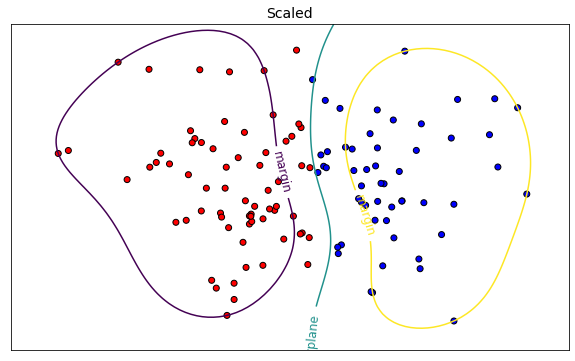

In [8]:
# display decision boundary
from matplotlib.colors import ListedColormap

x_min, x_max = X_train_s[:, 0].min() - .5, X_train_s[:, 0].max() + .5
y_min, y_max = X_train_s[:, 1].min() - .5, X_train_s[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/100),
                     np.arange(y_min, y_max,(y_max-y_min)/100 ))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points
fig, ax= plt.subplots(figsize=(10,6))
plt.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train, cmap=cm_bright,
    edgecolors='k')
plt.title('Scaled', fontsize=14)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

Z = model.decision_function(sp.c_[xx.ravel(), yy.ravel()])
cs = ax.contour(xx, yy, Z.reshape(xx.shape), [-1, 0,1 ])
cs.levels = ['margin','hyperplane','margin']
ax.clabel(cs, cs.levels, inline=True, fontsize=12)
plt.show()

#### Exercice   
- Explain why SVM is sensitive to the scaling of the data
- Does the RBF kernel allow the correct separation of the unscaled data? What about the scaled data?

### Using a different kernel, for instance a linear kernel

In [9]:
# Fit unscaled data
model = SVC(kernel='linear', C=.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Classification accuracy **before scaling** with linear kernel: {}".format(accuracy_score(y_test,y_pred)))

Classification accuracy **before scaling** with linear kernel: 0.5625


In [10]:
# Fit scaled data
model = SVC(kernel='linear', C=.1)
model.fit(X_train_s,y_train)
y_pred = model.predict(X_test_s)
print("Classification accuracy **after scaling** with linear kernel: {}".format(accuracy_score(y_test,y_pred)))

Classification accuracy **after scaling** with linear kernel: 1.0


#### Exercice
- Is the linear kernel appropriate to separate the two class (*hint:* what is the true optimal separating function for this toy dataset)?
- What happen for the linear kernel for larger values of $C$, e.g. `C=1`, `C=10`, `C=100`or `C=1000`? Can you explain why in this case the accuracy is improved by increasing the cost parameter $C$ even for **unscaled data**?
- Add some noise (e.g. change the label for some data points) add check if it still works (good accuracy for unscaled data with large C)
